# Datahacks 2021

***Team Wild Rifters (Justin Liang, Jonathan Lo, Eric Wang)***


## Step 1: Data cleaning / Pre-processing

In [1]:
# Import data cleaning packages
import pandas as pd

In [2]:
# Pandas read_csv function to import dataframes
bitcoin_train = pd.read_csv('Datasets/bitcoin_train.csv')
bitcoin_test = pd.read_csv('Datasets/bitcoin_test.csv')

In [3]:
# Check the first 5 rows of the bitcoin_train dataframe
bitcoin_train.head()

,Unnamed: 0,address,year,day,length,weight,count,looped,neighbors,income,label
0,0,1BpvJgUs7UprQu9z8fLsP7pFvFcCscHRCV,2011,287,2,0.250000,1,0,2,3.009500e+08,white
1,1,1EnSeTPjMxZm9X9iQDYmMUDoLQQ3ouDN6F,2015,77,0,1.000000,1,0,1,4.820000e+07,white
2,2,1mwkhYHeoqGBkVW84yFpYCSqRDt5TWSBQ,2011,164,52,0.000977,23,0,2,2.349582e+10,white
3,3,19XUCsxgpHZGXKLgVMpdoyZqcFdeM3pGeE,2014,86,144,0.000001,1555,1152,2,9.581274e+07,white
4,4,14Ef6MGSYLEbigo55CpPBGEGSGYwwB7xhY,2015,261,6,0.250000,1,0,2,3.424024e+07,white


In [4]:
# Check the details of the dataframe
bitcoin_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333357 entries, 0 to 2333356
Data columns (total 11 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   address     object 
 2   year        int64  
 3   day         int64  
 4   length      int64  
 5   weight      float64
 6   count       int64  
 7   looped      int64  
 8   neighbors   int64  
 9   income      float64
 10  label       object 
dtypes: float64(2), int64(7), object(2)
memory usage: 195.8+ MB


Using the info function, we can get a general idea of the dataframe dtypes as well as the total number of columns. All the dtypes look correct with no conversions required, but the column Unnamed: 0 appears to be the row index carried over from the csv file. Since the pandas dataframe already has it's own built in index, we can drop that column.

**Edit: In order to match with the bitcoin_test.csv file we were provided, we did not drop the Unnamed: 0 column from our training data as we were not allowed to modify/clean the bitcoin_test.csv file.**

In [5]:
# Drop the row index column
# bitcoin_train = bitcoin_train.drop('Unnamed: 0', axis=1)

For future analysis, we can establish the variable type of each feature.
- address: qualitative
- year: quantitative
- day: quantitative
- length: quantitative
- weight: quantitative
- count: quantitative
- looped: quantitative
- income: quantitative
- label: qualitative

We also notice that `year` and `day` represent the transaction date, so we can combine the two to derive a datetime `date` feature for our dataframe.

In [6]:
bitcoin_train['date'] = pd.to_datetime(bitcoin_train['year'] * 1000 + bitcoin_train['day'], format='%Y%j')

It may be beneficial to sort our dataframe chronologically, so let's do that now.

In [7]:
bitcoin_train = bitcoin_train.sort_values('date')

In [8]:
bitcoin_train

,Unnamed: 0,address,year,day,length,weight,count,looped,neighbors,income,label,date
2143902,2143902,12ytBU5EHDDEz4iudKVpLtvegQZFy1Fzdx,2011,1,38,9.536743e-07,1,0,2,4.620000e+10,white,2011-01-01
1053133,1053133,1HSELaheFmPw1nk6RUU4ovXLbhGP79FbpJ,2011,1,36,1.907349e-06,1,0,2,5.110200e+10,white,2011-01-01
210861,210861,124TQXntz7akAYCrUxDjLuVg7fLGTJqcgt,2011,1,6,6.250000e-02,1,0,1,1.889000e+09,white,2011-01-01
1491177,1491177,1FhMt2iTqJdwupYbgAHzZiRj4CGGZBjAdu,2011,1,8,8.750000e-01,4,0,2,4.778000e+09,white,2011-01-01
270322,270322,1H8bG6rjcEoeuus9RiR2VcYkbMF5QDeTqp,2011,1,58,9.313226e-10,1,0,2,2.530000e+09,white,2011-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
142263,142263,3B1Rt9AvBaG87ncHAwYR4FE33BZTrDH9cr,2018,330,144,9.095650e-02,4142,0,2,3.105686e+08,white,2018-11-26
1365766,1365766,369CeByY5HyCMiy8ZUAo6rTAzHqZnZz2XE,2018,330,0,5.000000e-01,1,0,1,1.722578e+08,white,2018-11-26
7481,7481,3BMEXnk3r1suDs8jWSRRcEAXAEn7CZxcgm,2018,330,2,3.750000e-01,1,1,2,2.269343e+08,white,2018-11-26
1663186,1663186,18cvuNsgvhb3jhHDS14fgvcb2dWiXtuLkv,2018,330,14,2.000000e-02,1,0,2,1.008500e+08,white,2018-11-26


In [9]:
# Check for null values in each feature
bitcoin_train.isnull().sum()

Unnamed: 0    0
address       0
year          0
day           0
length        0
weight        0
count         0
looped        0
neighbors     0
income        0
label         0
date          0
dtype: int64

Although the dataframe doesn't contain any null values, there may be placeholder values that skew the data incorrectly. Let's loop through each column and check their unique values for any odd values.

In [10]:
# Check unique values of each column to identify any outliers, mispellings, or discrepencies
for col in bitcoin_train.columns:
    print(col + ' values:')
    print((bitcoin_train[col].unique()))

Unnamed: 0 values:
[2143902 1053133  210861 ...    7481 1663186  449720]
address values:
['12ytBU5EHDDEz4iudKVpLtvegQZFy1Fzdx' '1HSELaheFmPw1nk6RUU4ovXLbhGP79FbpJ'
 '124TQXntz7akAYCrUxDjLuVg7fLGTJqcgt' ...
 '3BMEXnk3r1suDs8jWSRRcEAXAEn7CZxcgm' '18cvuNsgvhb3jhHDS14fgvcb2dWiXtuLkv'
 '3NYRNV7qReWZGdCrzonypcaeNDTpbWfvgX']
year values:
[2011 2012 2013 2014 2015 2016 2017 2018]
day values:
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 

In [11]:
# Use value counts to identify distribution of labels
bitcoin_train['label'].value_counts()

white                  2300268
CryptoWall                9872
CryptoLocker              7422
Cerber                    7381
Locky                     5320
CryptXXX                  1933
NoobCrypt                  388
DMALockerv3                290
DMALocker                  210
CryptoTorLocker2015         47
SamSam                      45
GlobeImposter               36
Globev3                     28
WannaCry                    24
Globe                       22
Razy                        13
APT                          8
KeRanger                     8
CryptConsole                 7
XTPLocker                    7
Flyper                       7
VenusLocker                  6
JigSaw                       4
XLockerv5.0                  4
EDA2                         3
ComradeCircle                1
XLocker                      1
Sam                          1
Jigsaw                       1
Name: label, dtype: int64

In [12]:
bitcoin_train['label'].value_counts().iloc[:4]

white           2300268
CryptoWall         9872
CryptoLocker       7422
Cerber             7381
Name: label, dtype: int64

All the values seem correct, and we can use the value_counts function to tentatively identify that the top 3 ransom labels are CryptoWall (9,872 transactions), CryptoLocker (7,422 transactions), and Cerber (7,381 transactions).

With that, our data is sufficiently cleaned, and we can proceed with the next step of Data Visualization.

## Step 2: Data Visualization

In [13]:
# Import Data Viz packages
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

Since the visualization of white labels is so dense due to the greater volume of data, we exclude it for some basic visualizations to get a better idea of how the different ransomwares are related to each other. We also exclude outliers because they don't have a large effect on how the primary relationships are visualized.

In [14]:
excl_white = bitcoin_train[bitcoin_train['label'] != 'white']
excl_weight_outliers = excl_white[np.abs(excl_white.weight-excl_white.weight.mean()) <= (3*excl_white.weight.std())]

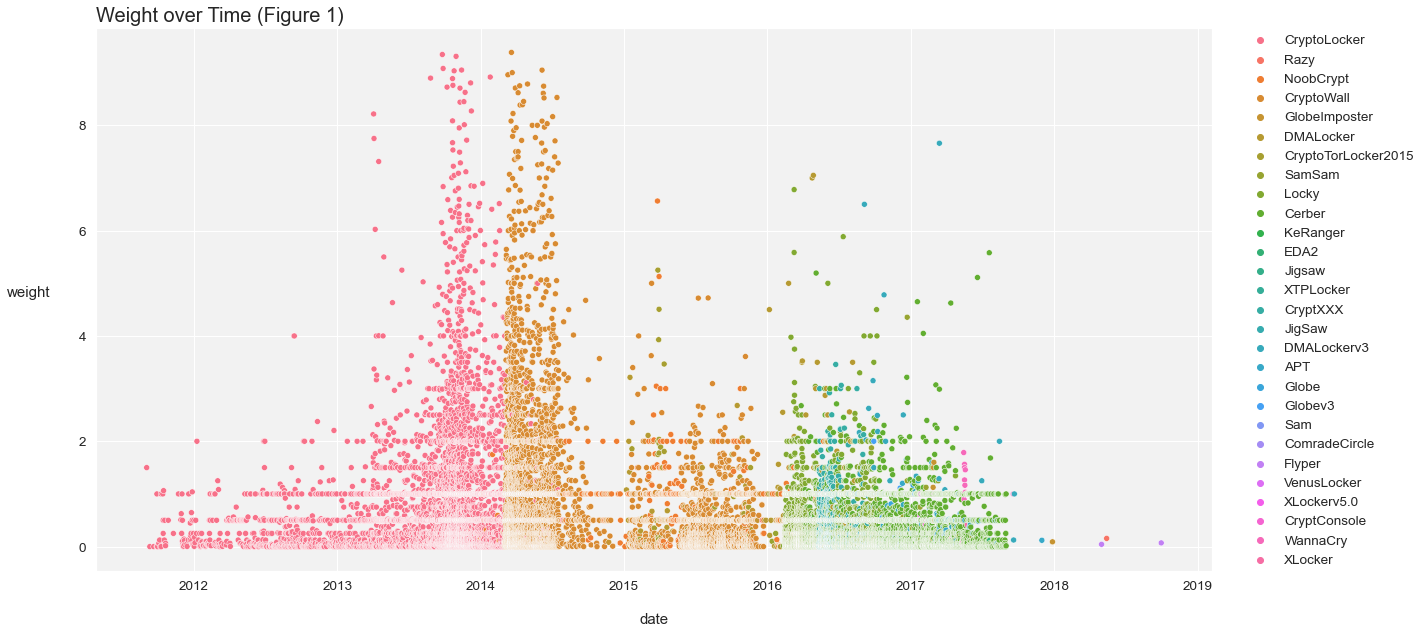

In [15]:
plt.figure(figsize = (20,10))
sns.set(font_scale = 1.23)

fig = sns.scatterplot(data = excl_weight_outliers, x = 'date', y = 'weight', hue = 'label')
fig.patch.set_facecolor('#f2f2f2')
fig.patch.set_edgecolor('black')
fig.set_ylabel('weight', fontsize=15, rotation=0)
fig.set_xlabel('date', fontsize=15, rotation=0)
fig.set_title('Weight over Time (Figure 1)', fontsize=20, loc='left')
fig.yaxis.labelpad = 50
fig.xaxis.labelpad = 20
plt.legend(facecolor = 'white', edgecolor = 'white', bbox_to_anchor = (1.02, 1.01), loc = 2)

In [16]:
excl_length_outliers = excl_white[np.abs(excl_white.length-excl_white.length.mean()) <= (3*excl_white.length.std())]

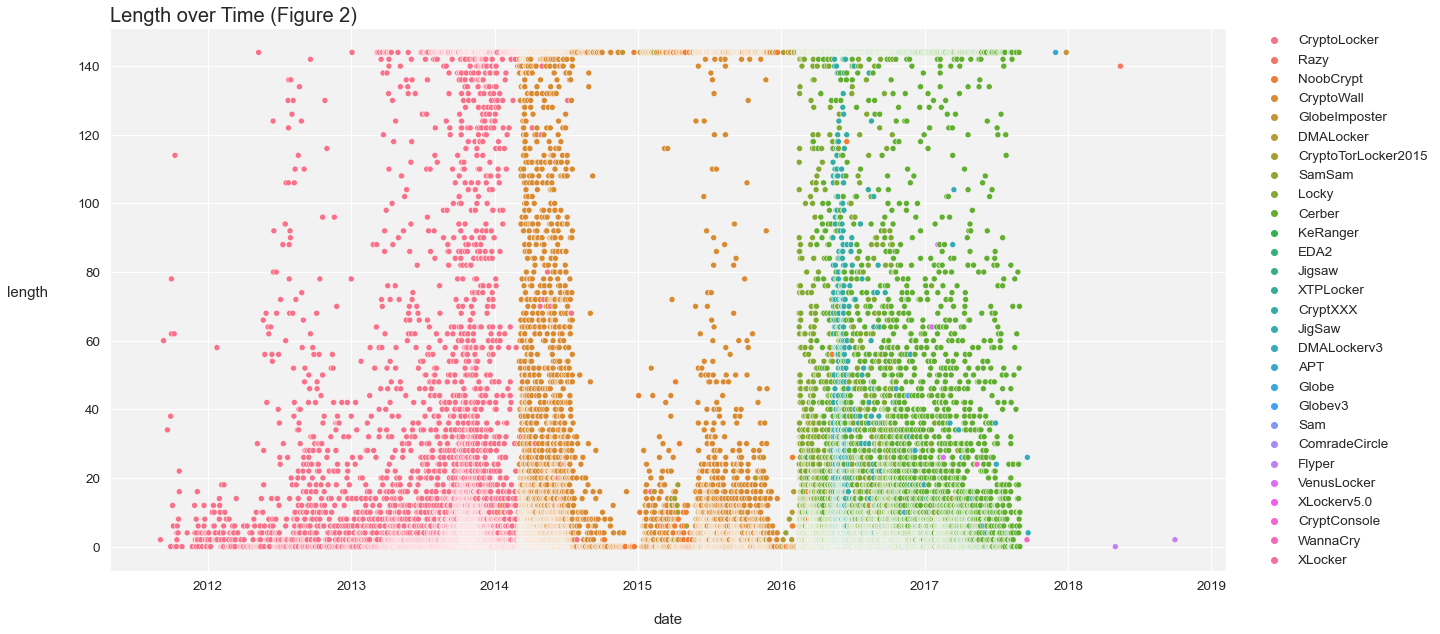

In [17]:
plt.figure(figsize = (20,10))
sns.set(font_scale = 1.23)

fig = sns.scatterplot(data = excl_weight_outliers, x = 'date', y = 'length', hue = 'label')
fig.patch.set_facecolor('#f2f2f2')
fig.patch.set_edgecolor('black')
fig.set_ylabel('length', fontsize=15, rotation=0)
fig.set_xlabel('date', fontsize=15, rotation=0)
fig.set_title('Length over Time (Figure 2)', fontsize=20, loc='left')
fig.yaxis.labelpad = 50
fig.xaxis.labelpad = 20
plt.legend(facecolor = 'white', edgecolor = 'white', bbox_to_anchor = (1.02, 1.01), loc = 2)

In [18]:
excl_white = bitcoin_train[bitcoin_train['label'] != 'white']
excl_neighbors_outliers = excl_white[np.abs(excl_white.neighbors-excl_white.neighbors.mean()) <= (3*excl_white.neighbors.std())]
excl_n_l_outliers = excl_neighbors_outliers[np.abs(excl_neighbors_outliers.neighbors-excl_neighbors_outliers.neighbors.mean()) <= (3*excl_neighbors_outliers.neighbors.std())]

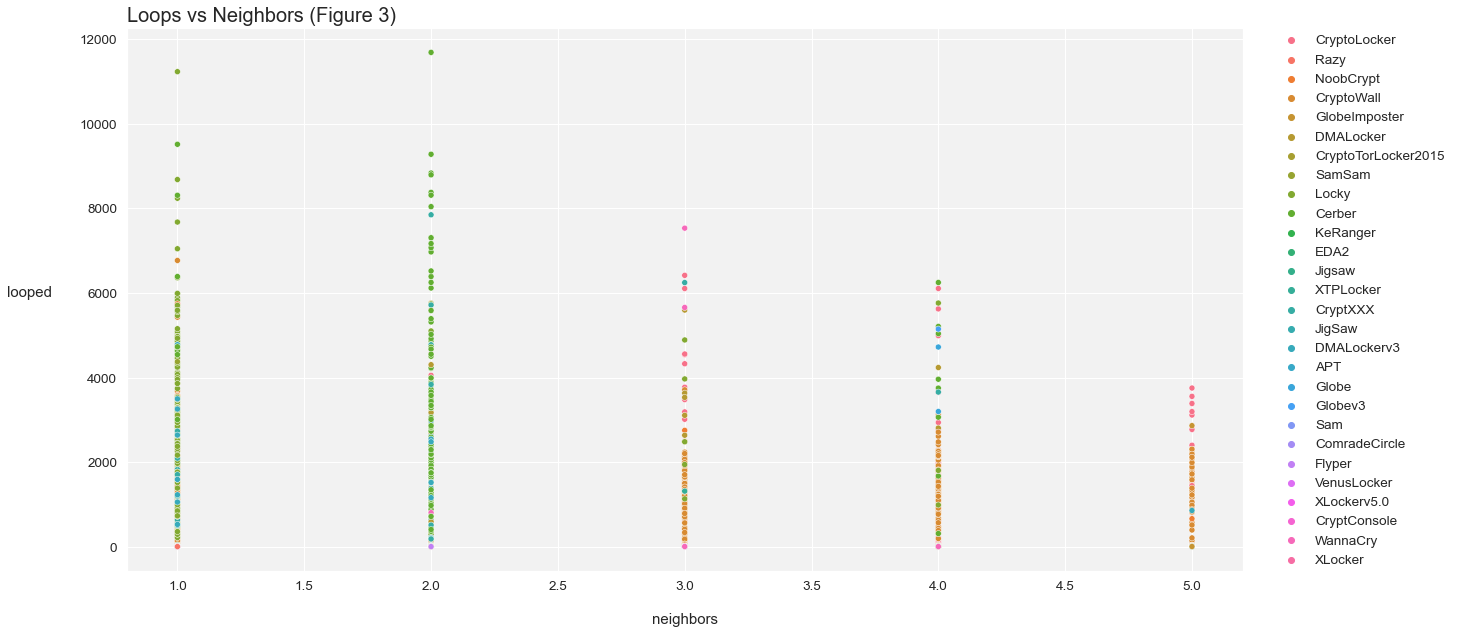

In [19]:
plt.figure(figsize = (20,10))
sns.set(font_scale = 1.23)

fig = sns.scatterplot(data = excl_n_l_outliers, x = 'neighbors', y = 'looped', hue = 'label')
fig.patch.set_facecolor('#f2f2f2')
fig.patch.set_edgecolor('black')
fig.set_ylabel('looped', fontsize=15, rotation=0)
fig.set_xlabel('neighbors', fontsize=15, rotation=0)
fig.set_title('Loops vs Neighbors (Figure 3)', fontsize=20, loc='left')
fig.yaxis.labelpad = 50
fig.xaxis.labelpad = 20
plt.legend(facecolor = 'white', edgecolor = 'white', bbox_to_anchor = (1.02, 1.01), loc = 2)

In [20]:
excl_length_outliers = excl_white[np.abs(excl_white.length-excl_white.length.mean()) <= (3*excl_white.length.std())]
excl_l_w_outliers = excl_length_outliers[np.abs(excl_length_outliers.weight-excl_length_outliers.weight.mean()) <= (3*excl_length_outliers.weight.std())]

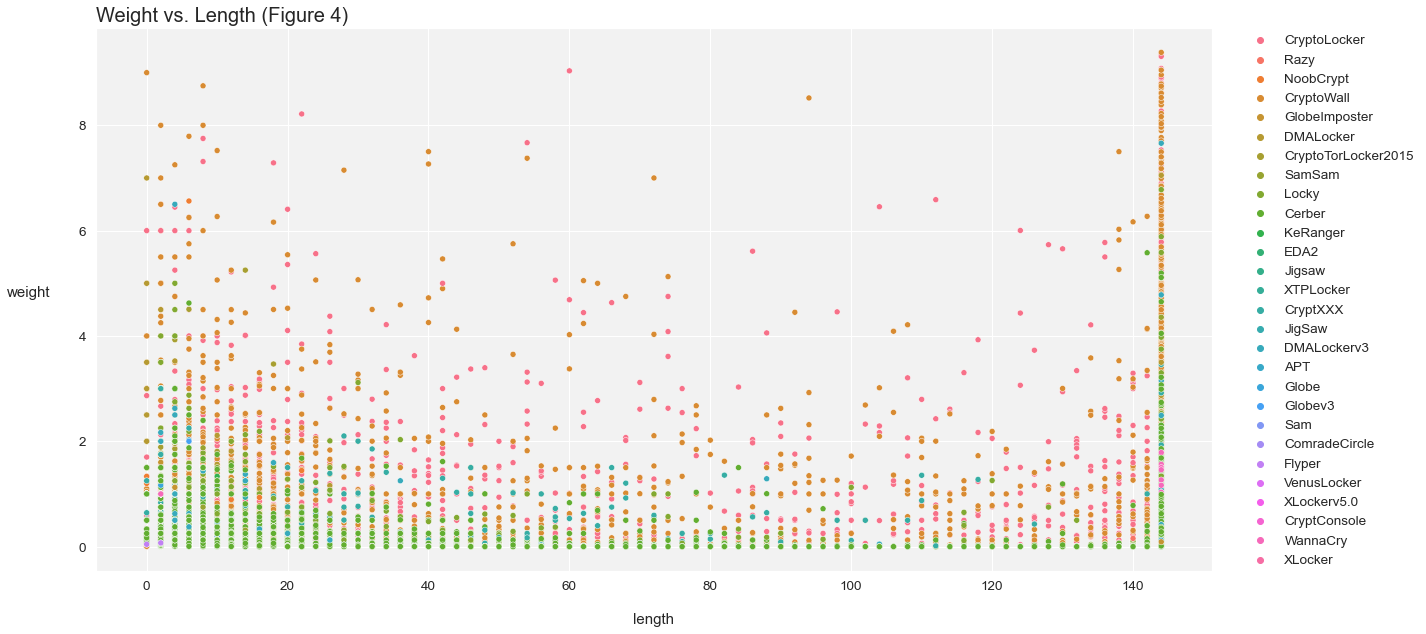

In [21]:
plt.figure(figsize = (20,10))
sns.set(font_scale = 1.23)

fig = sns.scatterplot(data = excl_l_w_outliers, x = 'length', y = 'weight', hue = 'label')
fig.patch.set_facecolor('#f2f2f2')
fig.patch.set_edgecolor('black')
fig.set_ylabel('weight', fontsize=15, rotation=0)
fig.set_xlabel('length', fontsize=15, rotation=0)
fig.set_title('Weight vs. Length (Figure 4)', fontsize=20, loc='left')
fig.yaxis.labelpad = 50
fig.xaxis.labelpad = 20
plt.legend(facecolor = 'white', edgecolor = 'white', bbox_to_anchor = (1.02, 1.01), loc = 2)

In [22]:
excl_count_outliers = excl_white[np.abs(excl_white['count']-excl_white['count'].mean()) <= (3*excl_white['count'].std())]
excl_c_l_outliers = excl_count_outliers[np.abs(excl_white['looped']-excl_white['looped'].mean()) <= (3*excl_white['looped'].std())]

C:\Users\Eric Wang\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


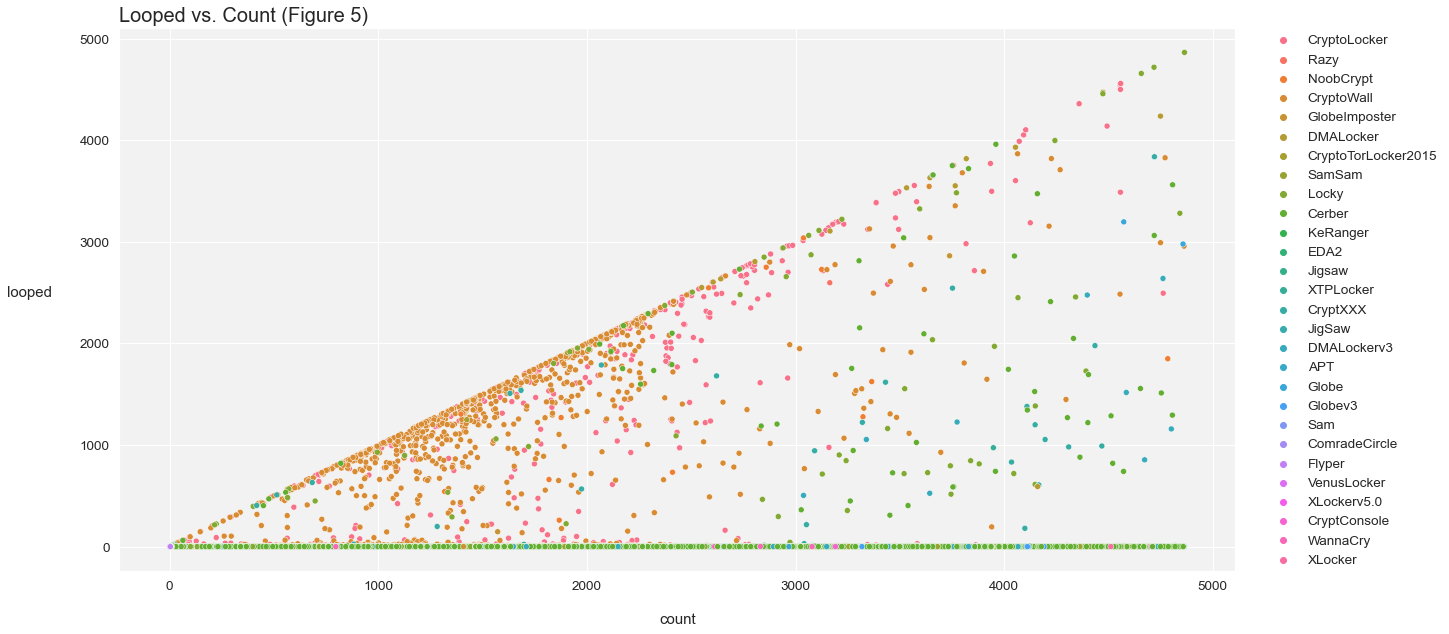

In [23]:
plt.figure(figsize = (20,10))
sns.set(font_scale = 1.23)

fig = sns.scatterplot(data = excl_count_outliers, x = 'count', y = 'looped', hue = 'label')
fig.patch.set_facecolor('#f2f2f2')
fig.patch.set_edgecolor('black')
fig.set_ylabel('looped', fontsize=15, rotation=0)
fig.set_xlabel('count', fontsize=15, rotation=0)
fig.set_title('Looped vs. Count (Figure 5)', fontsize=20, loc='left')
fig.yaxis.labelpad = 50
fig.xaxis.labelpad = 20
plt.legend(facecolor = 'white', edgecolor = 'white', bbox_to_anchor = (1.02, 1.01), loc = 2)

Plotting the ransomware label weights (excluding white labels and outliers) over time in figures 1 and 2 reveals a few interesting patterns.

1. There are somewhat overlapping but distinct windows of time during which specific ransomware transactions were made.
2. In previous years (2011 - 2014), we can see more distinct cutoffs when only one or two ransomwares are used at the same time, but later years (2015 - 2019) have a much greater variety of ransomwares used.
3. There are odd groupings around even intervals of weight. We can see horizontal line patterns at approximately `weight`= {0.25, 0.5, 1, 1.5, 2, and 3}. This is likely some kind of rounding process that occurred during the data collection process where values close to these specific values are defaulted to the nearest value.

More observations can be gleaned from the features' relationships with each other in figures 3, 4, and 5.

1. It appears as though there is some form of distinction between the number of neighbors specific ransomwares have in their transactions (shown in figure 4).
2. The count value seems to define the maximum looped value (shown in figure 5). This could be because larger bitcoin transactions require greater personal info/data security through extensive looping.

## Step 3: Hypothesis/Experimental Testing

Since we only have a general idea of each features' relationship with `label`, we want to conduct some hypothesis tests to identify statistically significant feature trends that can be used in a machine learning model. We'll conduct a hypothesis test for measures of center and spread such as mean, min, max, etc. on our quantitative data (`length`, `weight`, `count`, `looped`, `neighbors`, `date`, and `label`).

*Note: we excluded year, day, and date since they aren't measures of the actual transaction properties.*

**We ended up running out of time before completing additional hypothesis tests.**

For our first hypothesis test, we define the hypotheses as follows:

$H_{0}$: The average weight of white labels equal the average weight of non-white labels.

$H_{a}$: The average weight of white labels does not equal the average weight of non-white labels.

Since we are comparing two groups in a sample, we conduct an independent samples t-test. This will involve calculating pooled standard deviation in order to calculate the test statistic. We also want a significance level of 0.05.

In [24]:
# Import Hypothesis testing packages
import numpy as np
from scipy import stats

In [25]:
white_only = bitcoin_train[bitcoin_train['label'] == 'white']
white_weight = white_only['weight'].mean()
white_count = white_only.shape[0]
white_std = white_only['weight'].std()
white_weight

0.5444412201516179

In [26]:
ransomware_only = bitcoin_train[bitcoin_train['label'] != 'white']
ransomware_weight = ransomware_only['weight'].mean()
ransomware_count = ransomware_only.shape[0]
ransomware_std = ransomware_only['weight'].std()
ransomware_weight

0.6288455501721444

In [27]:
pooled_variance = (((white_count - 1) * (white_std ** 2)) + ((ransomware_count - 1) * (ransomware_std ** 2))) / (white_count + ransomware_count - 2)
std_error = np.sqrt(pooled_variance) * np.sqrt((1 / white_count) + (1 / ransomware_count))
t_s = (white_weight - ransomware_weight) / std_error
t_s

-4.1733257275897175

The test statistic we calculate is t = -4.1733, and we can compare it to the corresponding t-value (based on degrees of freedom) through the scipy t.cdf function.

In [28]:
deg_of_f = white_count + ransomware_count - 2
deg_of_f

2333355

In [29]:
p = (1 - stats.t.cdf(abs(t_s), deg_of_f)) * 2
p

3.0019614845944176e-05

Because our p-value is 3.002e-05 which is less than the significance level of 0.05, we are able to reject the null hypothesis. There is a statistically significant difference between average white label weight and average ransomware label weight. We can also repeat this process on all the features, but due to time constraints, we are not able to complete additional hypothesis tests just yet.

## Step 4: Classification of Ransomware

In [30]:
# Import machine learning packages
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB

**Edit: In order to match the bitcoin_test.csv file, we are dropping the previously added date feature. This is because our machine learning model needs to be fit to a dataset with the same number of features as the one it does predictions on (bitcoin_test.csv).**

In [31]:
train_labels = bitcoin_train['label']
train_features = bitcoin_train.drop(['label', 'date'], axis=1)

In [32]:
# Creating the pipeline

# Discerning categorical features
categorical_features = ['address']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Discern numeric features
numeric_features = ['length', 'weight', 'count', 'looped', 'neighbors', 'income']
numeric_transformer = Pipeline(steps=[
    ('stdscaler', StandardScaler())])

# Use the columntransformer to preprocess
base_preprocessor = ColumnTransformer(
    transformers=[('cat', categorical_transformer, categorical_features),
                 ('num', numeric_transformer, numeric_features)], remainder="drop")

baseline_pl = Pipeline(steps=[('preprocessor', base_preprocessor),
                      ('classifier', BernoulliNB())])

In [33]:
baseX_train, baseX_test, basey_train, basey_test = train_test_split(train_features, train_labels, test_size=0.2, random_state=69420)
reals = basey_test.to_list()

In [34]:
preds = baseline_pl.fit(baseX_train, basey_train).predict(baseX_test)

In [35]:
print(accuracy_score(preds, reals))

0.985846590324682


In [36]:
test_preds = baseline_pl.fit(train_features, train_labels).predict(bitcoin_test)

In [37]:
bitcoin_test['predicted_label'] = test_preds

In [38]:
bitcoin_test.head()

,Unnamed: 0,address,year,day,length,weight,count,looped,neighbors,income,predicted_label
0,0,16r8CxcVCypUFzvHHZYttyiZtMaGnJn3te,2014,49,0,1.0000,1,0,2,1.000000e+09,white
1,1,12EK9jUdG3heM7AF6Abyp38yuNMHN4dcq1,2017,265,36,0.0625,1,0,2,1.301765e+09,white
2,2,16xUAFderxZwbEp9yuz4FdPnMVxTQntcwN,2017,44,0,1.0000,1,0,2,6.245187e+07,white
3,3,1JvUt1UUDey7JY7WYHNTBSUNuhq1Vkbdfd,2013,264,4,0.1875,2,0,2,2.079400e+08,white
4,4,138BLKDpeNyKdHnrLT6hZMW119sD4PZJ6D,2014,348,48,1.0000,1,0,2,1.013901e+10,white


In [39]:
bitcoin_test.to_csv('predictions.csv', chunksize=1000)